#### Every person starting their DataScience journey will take on 'THE TITANIC DATASET' to understand various foundational concepts. It is just like MNIST of Kaggle. And, since I am to starting this journey here I am.

This notebook will be used by me for some time as reference, while I make the foundational concepts a 'BRAIN MEMORY' (like muscle memory, ya know). Feel free to use this notebook as your reference while you make yours (IT IS IMPORTANT).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

# Setting up the Environment

In [2]:
import sys

# Libraries for Data-Visualization:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling # library for automatic EDA
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px # interactive plotting library
"""
!pip install pycomp
from pycomp.viz.insights import *
from pycomp.viz.formatador import *
"""

from IPython.display import display # display from IPython.display
from itertools import cycle # function used for cycling over values
#%pip install ppscore # installing ppscore, library used to check non-linear relationships between our variables
#import ppscore as pps # importing ppscore

# just to check the module version
import sklearn
#import autoviz

# Libraries for selecting the best model:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict, cross_val_score

# Libraries containing different Classifier Algorithms:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Libraries for manipulating the data and finding model-accuracy: 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics # metrics contains the given beow functions:-
                            # roc_curve, roc_suc_score, precision_recall_curve, 
                            # f1_score, recall_score, precision_score, confusion_matrix

In [3]:
sys.path.insert(1, '/home/priyam145/Desktop/SwiftViz/swiftviz')

In [4]:
import swiftviz as sv

In [5]:
for module in [np, mpl, pd, sns, sklearn, pandas_profiling]:
    print(f'{module}:-----{module.__version__}')

<module 'numpy' from '/home/priyam145/miniconda3/envs/MLenv_lite/lib/python3.8/site-packages/numpy/__init__.py'>:-----1.18.5
<module 'matplotlib' from '/home/priyam145/miniconda3/envs/MLenv_lite/lib/python3.8/site-packages/matplotlib/__init__.py'>:-----3.2.1
<module 'pandas' from '/home/priyam145/miniconda3/envs/MLenv_lite/lib/python3.8/site-packages/pandas/__init__.py'>:-----1.1.5
<module 'seaborn' from '/home/priyam145/miniconda3/envs/MLenv_lite/lib/python3.8/site-packages/seaborn/__init__.py'>:-----0.10.0
<module 'sklearn' from '/home/priyam145/miniconda3/envs/MLenv_lite/lib/python3.8/site-packages/sklearn/__init__.py'>:-----0.23.2
<module 'pandas_profiling' from '/home/priyam145/miniconda3/envs/MLenv_lite/lib/python3.8/site-packages/pandas_profiling/__init__.py'>:-----2.9.0


# Loading Datasets

In [6]:
train_df = pd.read_csv('../data/titanic/train.csv')
test_df = pd.read_csv('../data/titanic/test.csv')
test_df_results = pd.read_csv('../data/titanic/gender_submission.csv')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_df_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# EDA:

In [10]:
cust_palette = rp.CustomPalette()

In [11]:
report = pandas_profiling.ProfileReport(train_df, minimal=True)

In [12]:
# Let's look at the generated report
report

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


# Helper Functions

In [13]:
def unique_val_print(dataset):
    for col in dataset.columns:
        print(f'{col}: {dataset[col].unique()}\nThe no.of unique entries in {col} are: {len(dataset[col].unique())}\n')

In [14]:
def continuous_unique_val(dataset, col):
    fig, axs = plt.subplots(nrows=2, figsize=(10, 10));
    sns.distplot(dataset[col], ax=axs[0])
    sns.boxplot(dataset[col], ax=axs[1]);

In [15]:
def outlier_finder(dataset, cols):
    quantiles_limit = dict()
    for col in cols:
        quantiles_limit[col]=dict()
        IQR_15 = 1.5*(np.quantile(dataset[col], 0.75) - np.quantile(dataset[col], 0.25))
        quantiles_limit[col]['left'] = np.quantile(dataset[col], 0.25) - IQR_15
        quantiles_limit[col]['right'] = np.quantile(dataset[col], 0.75) + IQR_15
    for col_name, values in quantiles_limit.items():
        if values['left'] <= dataset[col_name].min():
            values['left'] = None
        if values['right'] >= dataset[col_name].max():
            values['right'] = None
    return quantiles_limit

# Cleaning Datasets

###  *Data is like people – interrogate it hard enough and it will tell you whatever you want to hear.*

In [16]:
for dataset in [train_df, test_df, test_df_results]:
    print(f'{dataset.shape}\n{"-"*10}')

(891, 12)
----------
(418, 11)
----------
(418, 2)
----------


In [17]:
for dataset in [train_df, test_df, test_df_results]:
    print(f'{dataset.info()}\n{"-"*40}\n')    # The 'none' at the end of every dataframe.info() is because print() does not return anything.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

**train_df:**
- Age: 177 null
- Embarked: 2 null

**test_df:**
- Age: 86 null
- Fare: 1 null

*I have not mentioned 'Cabin' since we can already see that the null values exceed non-null. Hence, column will be dropped from both dataframes*

In [18]:
for dataset in [train_df, test_df]:
    dataset.drop('Cabin', axis=1, inplace=True)

In [19]:
print(train_df.columns,'\n', test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object') 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


## Train Data:

In [20]:
unique_val_print(train_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']])

Survived: [0 1]
The no.of unique entries in Survived are: 2

Pclass: [3 1 2]
The no.of unique entries in Pclass are: 3

Sex: ['male' 'female']
The no.of unique entries in Sex are: 2

SibSp: [1 0 3 4 2 5 8]
The no.of unique entries in SibSp are: 7

Parch: [0 1 2 5 3 4 6]
The no.of unique entries in Parch are: 7

Embarked: ['S' 'C' 'Q' nan]
The no.of unique entries in Embarked are: 4



### Everything is as needed.

#### Now, let's look at columns categorized as continuous - Age, Fare

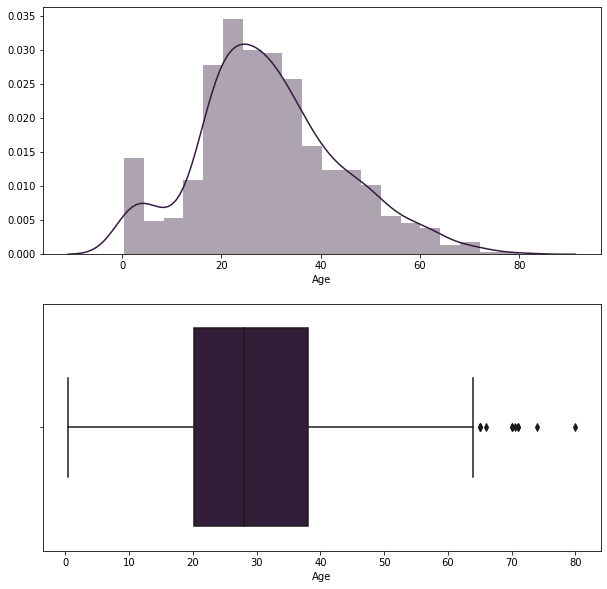

In [21]:
cust_palette.set_default_custom_palette('rocket')
continuous_unique_val(train_df, 'Age')

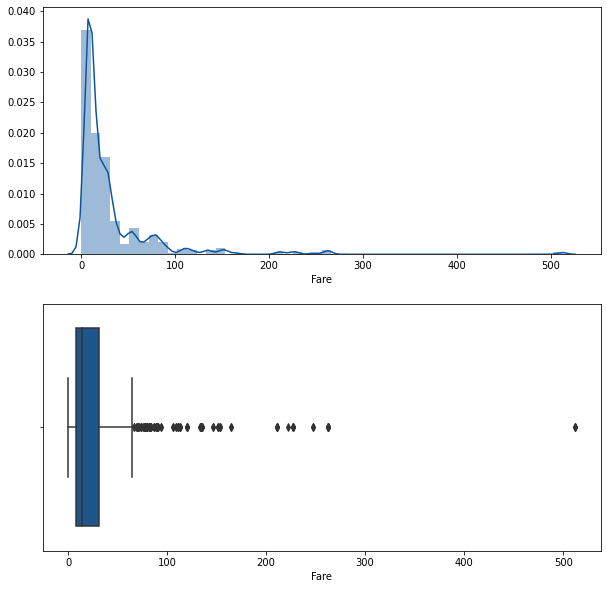

In [22]:
cust_palette.set_default_custom_palette('Blues_r')
continuous_unique_val(train_df, 'Fare')

### Taking care of Missing values:

#### 'Age' and 'Embarked' are the two columns having missing values
For 'Age' :
- We can use any from Median or Mean since we can see there are not too many outlier present but, just to stay clear from effect from any outlier effect

For 'Embarked' :
- Embarked contains information from where the passenger got onboard, so we can assume that the port from where the maximum no.of passengers were onboarded is the port which can be used for missing values. Hence Mode, since it resonates more with the feature. (Note, that for categorical attributes, mean and median cannot be found) 

In [23]:
temp_train_df = train_df.copy()  # I am making a temporary train_df for visualization because I
                                 # want use Pipelines for original dataframe, which we will see later. 
                                 # Here, I will be using fillna().

In [24]:
temp_train_df['Age'].fillna(temp_train_df.Age.median(), inplace=True)
temp_train_df['Embarked'].fillna(temp_train_df.Embarked.mode()[0], inplace=True)  # mode() returns a pandas series

In [25]:
temp_train_df[['Age', 'Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Embarked  891 non-null    object 
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [26]:
unique_val_print(temp_train_df[['Age', 'Embarked']])

Age: [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
The no.of unique entries in Age are: 88

Embarked: ['S' 'C' 'Q']
The no.of unique entries in Embarked are: 3



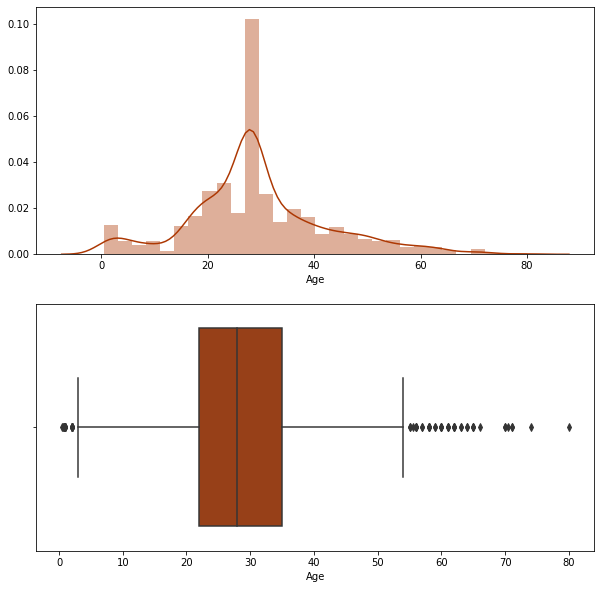

In [27]:
cust_palette.set_default_custom_palette('Oranges_r')
continuous_unique_val(temp_train_df, 'Age')

In [28]:
train_df_outliers = outlier_finder(temp_train_df, ['Age', 'Fare'])
train_df_outliers

{'Age': {'left': 2.5, 'right': 54.5}, 'Fare': {'left': None, 'right': 65.6344}}

## Test Data:

In [29]:
unique_val_print(test_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']])

Pclass: [3 2 1]
The no.of unique entries in Pclass are: 3

Sex: ['male' 'female']
The no.of unique entries in Sex are: 2

SibSp: [0 1 2 3 4 5 8]
The no.of unique entries in SibSp are: 7

Parch: [0 1 3 2 4 6 5 9]
The no.of unique entries in Parch are: 8

Embarked: ['Q' 'S' 'C']
The no.of unique entries in Embarked are: 3



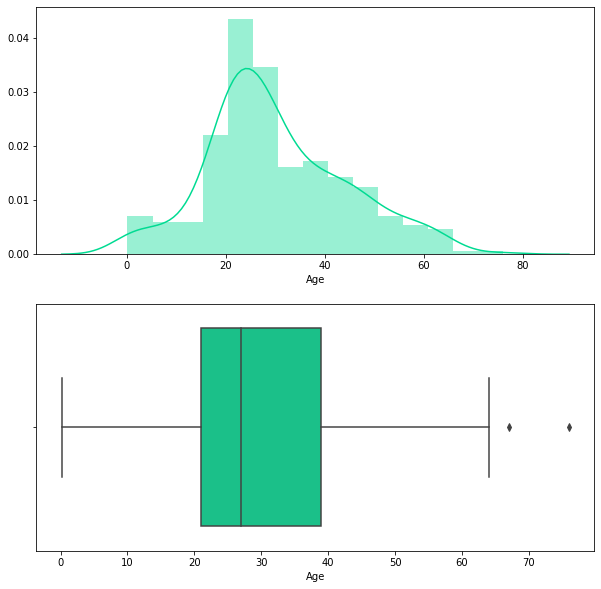

In [30]:
cust_palette.set_default_custom_palette('winter_r')
continuous_unique_val(test_df, 'Age')

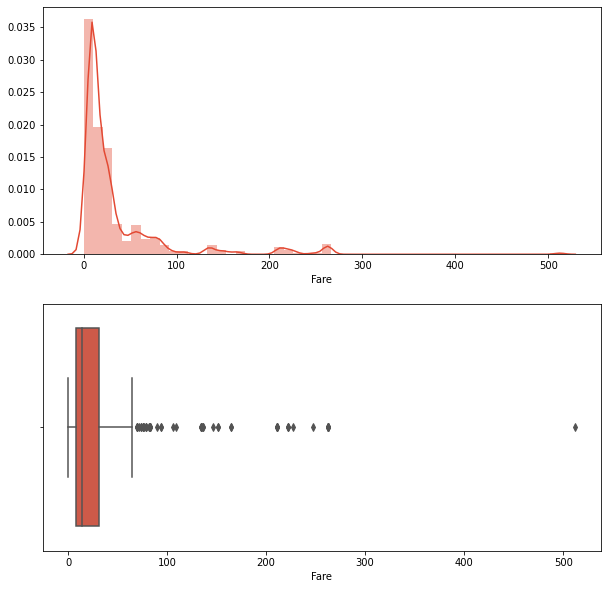

In [31]:
cust_palette.set_default_custom_palette('RdYlBu')
continuous_unique_val(test_df, 'Fare')

### Taking care of missing values:

test_df has missing values in columns - 'Age' & 'Fare'

In [32]:
temp_test_df = test_df.copy()

In [33]:
temp_test_df[['Age', 'Fare']] = temp_test_df[['Age', 'Fare']].apply(lambda x: x.fillna(x.median()))

In [34]:
temp_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


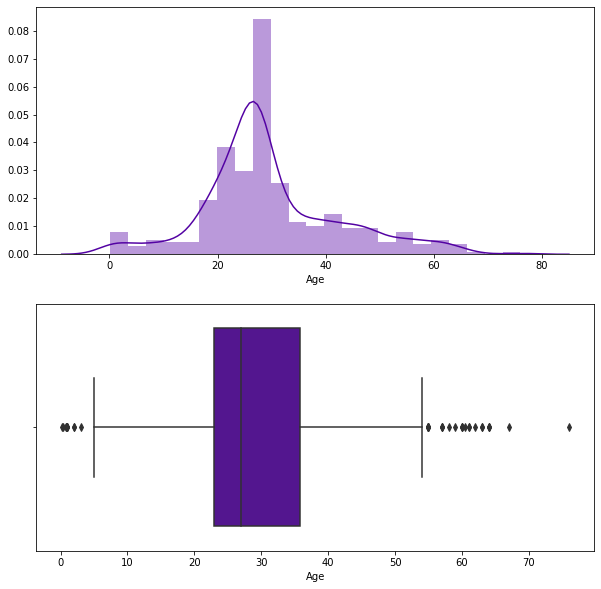

In [35]:
cust_palette.set_default_custom_palette('plasma')
continuous_unique_val(temp_test_df, 'Age')

In [36]:
test_df_outliers = outlier_finder(temp_test_df, ['Age', 'Fare'])
test_df_outliers

{'Age': {'left': 3.875, 'right': 54.875},
 'Fare': {'left': None, 'right': 66.8359875}}

# Visualization:

In [37]:
temp_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Let's look at the composition of different categorical variables w.r.t each other:

<br>
But, before that let's label encode our dataframe:

In [38]:
encoder = rp.Encoder()
encoded_df, key_dict = encoder.column_encoder(temp_train_df, ['Sex', 'Embarked'])
encoded_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


In [39]:
key_dict

{'Sex': array([['male', '0'],
        ['female', '1']], dtype='<U6'),
 'Embarked': array([['S', '0'],
        ['C', '1'],
        ['Q', '2']], dtype='<U1')}

The above given key dictionary is going to be useful to create labels because of how the below functions work, also it is better to know which values got replaced by what. 

In [40]:
cat_vars = np.array(['Survived', 'Pclass', 'Sex', 'Embarked'])

survived_pie_maker = rp.PieCompositionPlots(encoded_df, 'Survived')
sex_pie_maker = rp.PieCompositionPlots(encoded_df, 'Sex')
pclass_pie_maker = rp.PieCompositionPlots(encoded_df, 'Pclass')

## Survival Composition:

In [69]:
survived_labels = [['Not Survived - 1', 'Not Survived - 2', 'Not Survived - 3', 'Survived - 1', 'Survived - 2', 'Survived - 3'], 
                   ['Not Survived - Male', 'Not Survived - Female', 'Survived - Male', 'Survived - Female'], 
                   ['Not Survived - S', 'Not Survived - C', 'Not Survived - Q', 'Survived - S', 'Survived - C', 'Survived - Q']]

explode_survive = [[0, 0, 0.1, 0, 0, 0], [0.1, 0, 0, 0], [0.1, 0, 0, 0, 0, 0]]
survived_pie_maker.pie_plotly(list(cat_vars[cat_vars != 'Survived']), survived_labels, cols=3, width=1500, height=500, explode_list=explode_survive, verbo=0, hole=0.4)        # to get the                                                                                                                                                                                       # calculation steps,                                                                                                                                                                               # set "verbo=1"

## Sex Composition:

In [70]:
sex_labels = [['Male - 1st Class', 'Male - 2nd Class', 'Male - 3rd Class', 'Female - 1st Class', 'Female - 2nd Class', 'Female - 3rd Class'], 
              ['Male - S', 'Male - C', 'Male - Q', 'Female - S', 'Female - C', 'Female - S']]

explode_sex = [[0, 0, 0.1, 0, 0, 0], [0.1, 0, 0, 0, 0, 0]]
sex_pie_maker.pie_plotly(['Pclass', 'Embarked'], sex_labels, width=1500, height=500, explode_list=explode_sex, verbo=0, hole=0.4, color_theme="seaborn")

In [43]:
temp_train_df[temp_train_df.Sex == 'Female'].Embarked == 'Q'

Series([], Name: Embarked, dtype: bool)

No Females boarded titanic from Queenstown(Q)

## Pclass Composition:

In [44]:
pclass_labels = [['1st class - S', '1st class - C', '1st class - Q', '2nd class - S', '2nd class - C', '2rd class - Q', '3rd class - S', '3rd class - C', '3rd class - Q']]

explode_pclass = [[0, 0, 0.1, 0, 0, 0, 0.1, 0, 0]]
pclass_pie_maker.pie_plotly(['Embarked'], pclass_labels, width=1500, height=500, explode_list=explode_pclass, verbo=0, hole=0.4, color_theme='ggplot2')

### Insight Summary from composition analysis:

* Pclass = 3 was given least priority, and Pclass = 1 was given maximum priority.
* Females were given more priority as compared to Males by a large margin. 
* People who boarded from Southampton(S) were given less priority
* The difference in % of Male and Female passengers is highest for Pclass=1
* There were no Female who embarked from Queenstown(Q). (Calculation in the above cell)
* Also, majority of the people who embarked from Southampton(S) are male 

## Numerical Variables:

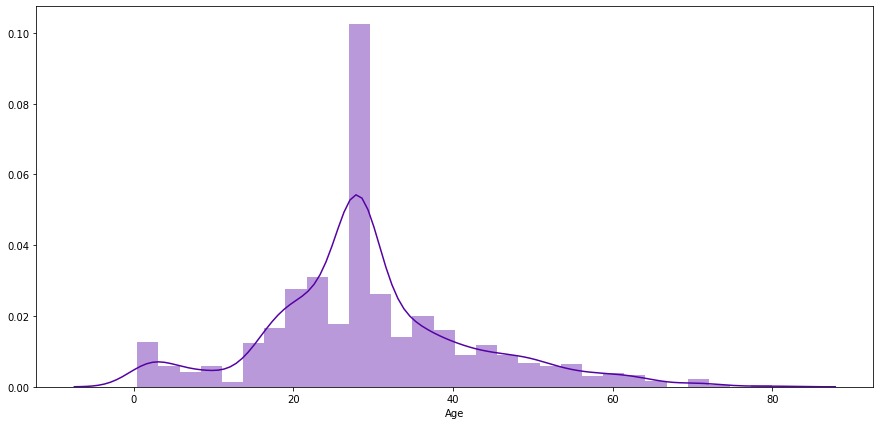

In [53]:
fig, axs = plt.subplots(figsize=(15, 7))

sns.distplot(temp_train_df.Age);

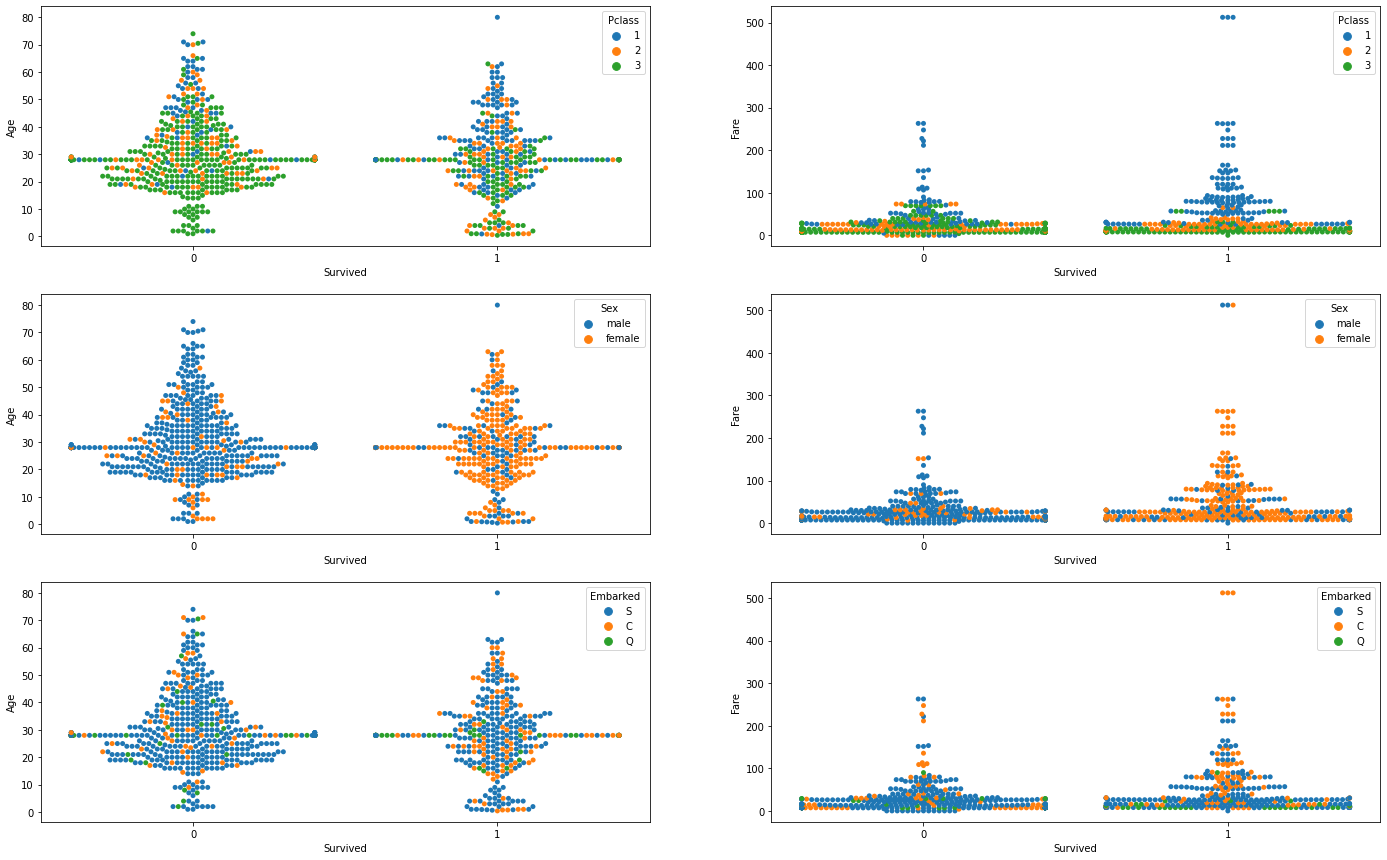

In [64]:
cust_palette.set_default_custom_palette('tab10')
fig, axs = plt.subplots(figsize=(24, 15), nrows=3, ncols=2)

plotter = rp.Plotter()
plot_axis = plotter.complete_axis_generator(['Age', 'Fare'], ['Pclass', 'Sex', 'Embarked'], rows=3, cols=2)

for hue, y, row, col in plot_axis:
    row = np.int64(row)
    col = np.int64(col)
    sns.swarmplot('Survived', y, data=temp_train_df, hue=hue, ax=axs[row, col])

Our guess was right, We can clearly see that passengers in 1st class were prioritised over others. Hence, 'Pclass' is clearly important.

In [58]:
fig = px.imshow(temp_train_df.corr())
fig.show()

# Model Selection: